Disease Prediction Using Machine Learning
aims to implement a robust machine-learning model that can efficiently predict the disease of a human, based on the symptoms that he/she possesses. Let us look into how we can approach this machine-learning problem:

Data preparation is the primary step for any machine learning problem. We will be using a dataset from Kaggle for this problem. This dataset consists of two CSV files one for training and one for testing. There is a total of 133 columns in the dataset out of which 132 columns represent the symptoms and the last column is the prognosis.
Cleaning is the most important step in a machine learning project. The quality of our data determines the quality of our machine-learning model. So it is always necessary to clean the data before feeding it to the model for training. In our dataset all the columns are numerical, the target column i.e. prognosis is a string type and is encoded to numerical form using a label encoder.
After gathering and cleaning the data, the data is ready and can be used to train a machine learning model. We will be using this cleaned data to train the Support Vector Classifier, Naive Bayes Classifier, and Random Forest Classifier. We will be using a confusion matrix to determine the quality of the models.
After training the three models we will be predicting the disease for the input symptoms by combining the predictions of all three models. This makes our overall prediction more robust and accurate.

importing relevant libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
training_data=pd.read_csv('Training.csv')
testing_data=pd.read_csv("Testing.csv")

In [4]:
training_data.shape


(4920, 134)

In [5]:
testing_data.shape

(42, 133)

In [6]:
training_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [7]:
testing_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


preprocessing

In [8]:
training_data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [9]:
testing_data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

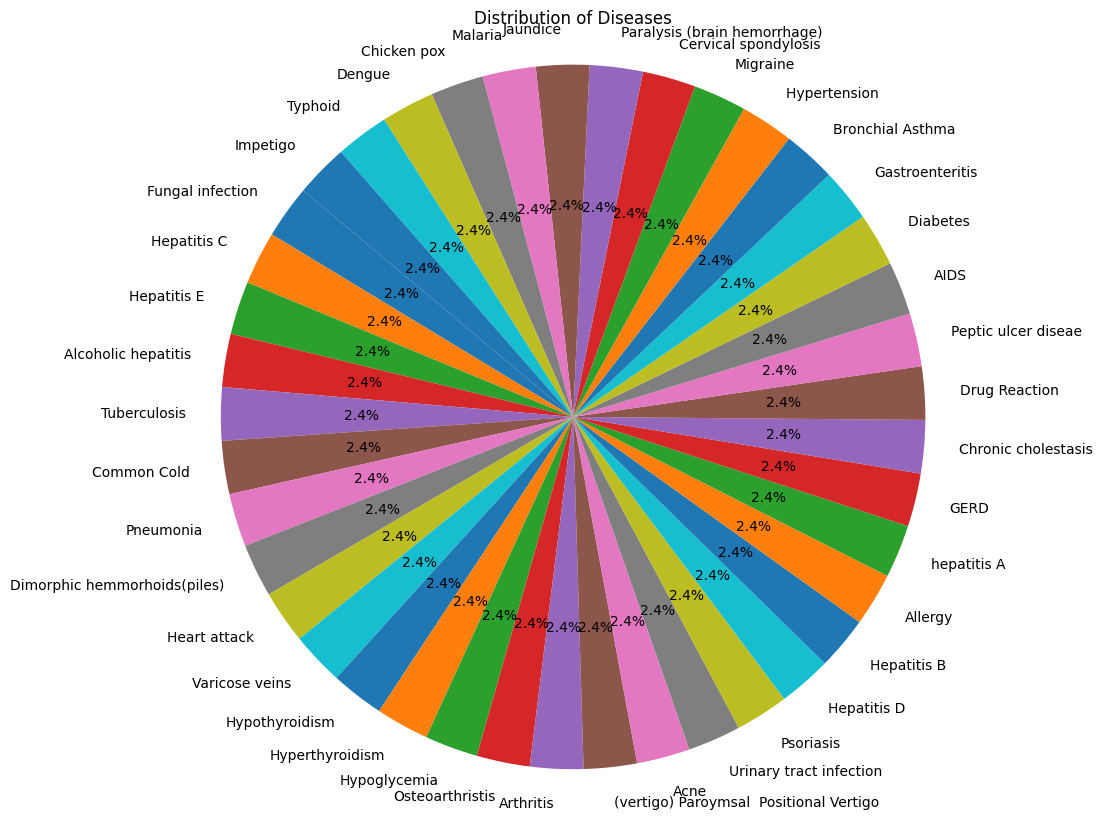

In [10]:
disease_counts = training_data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
plt.figure(figsize=(10, 10)) 
plt.pie(temp_df["Counts"], labels=temp_df["Disease"], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Diseases')  
plt.show()

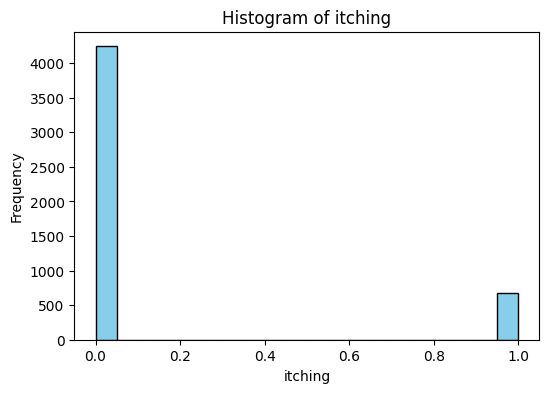

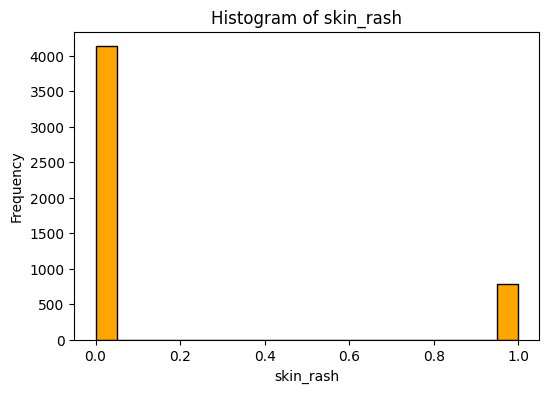

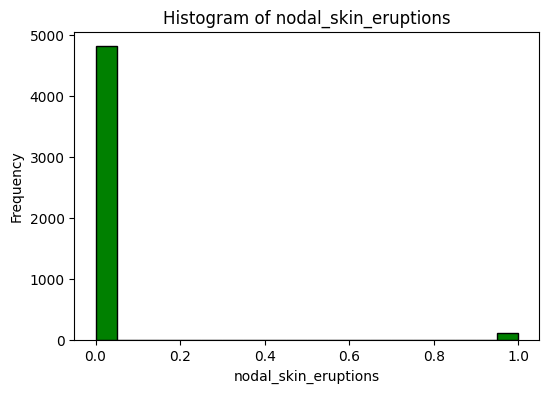

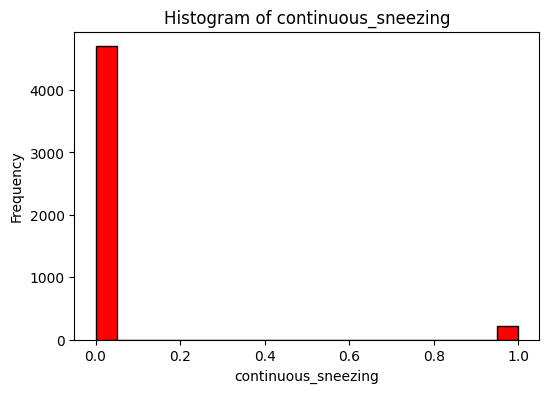

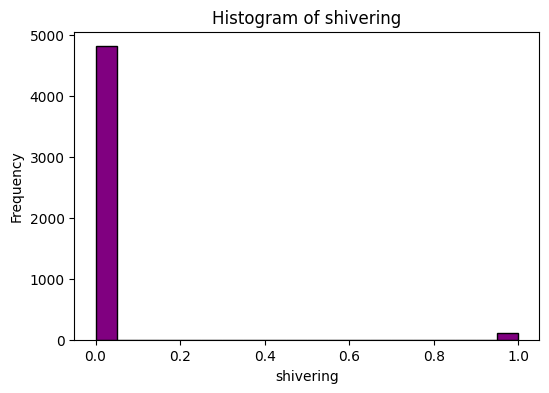

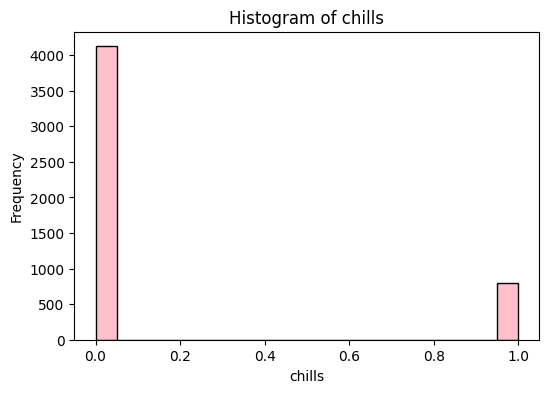

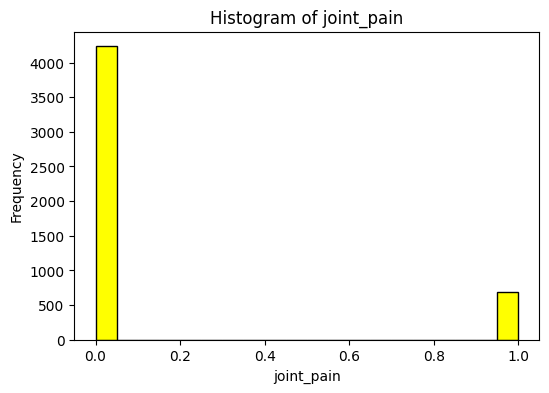

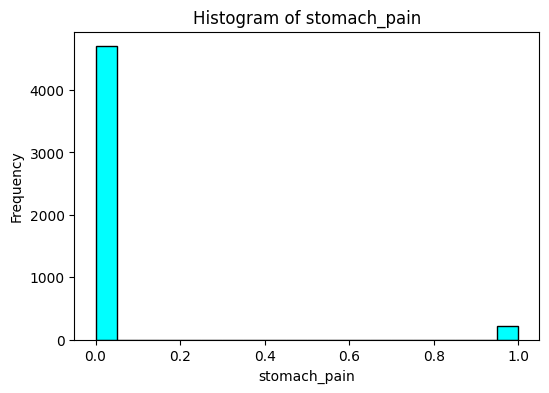

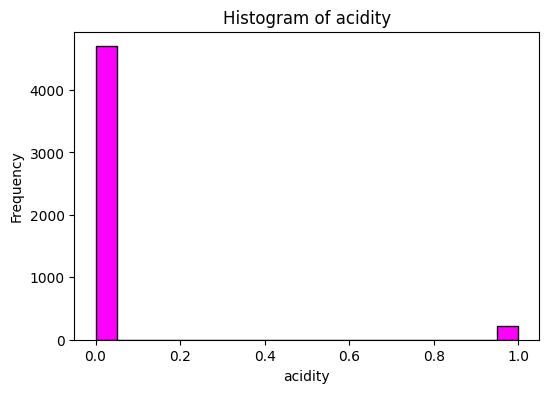

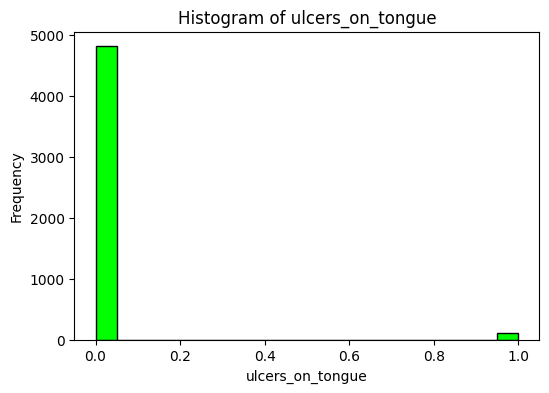

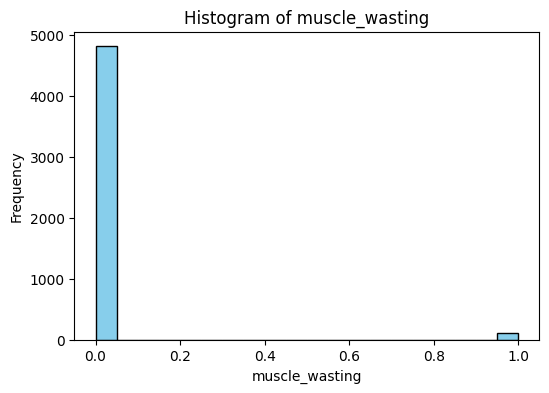

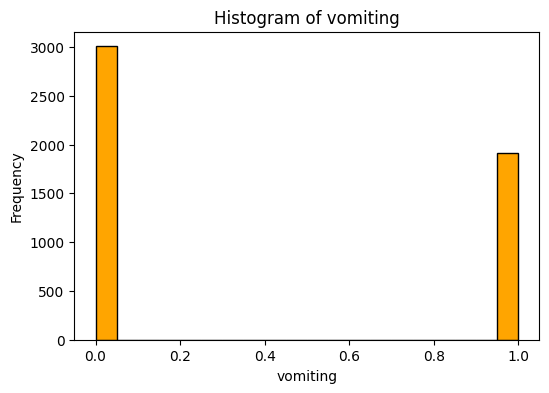

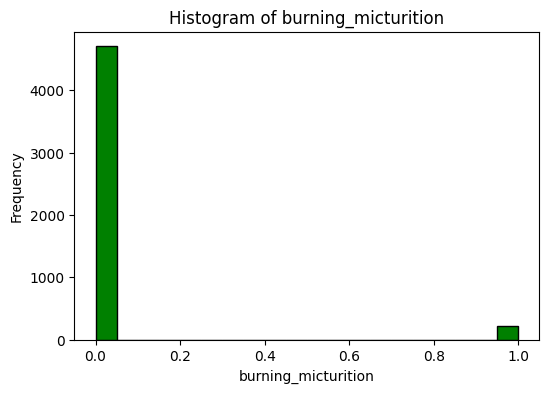

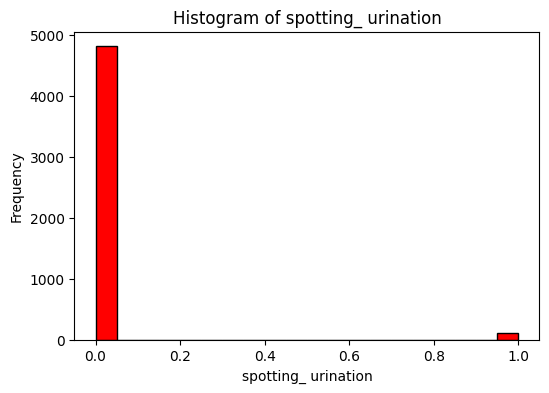

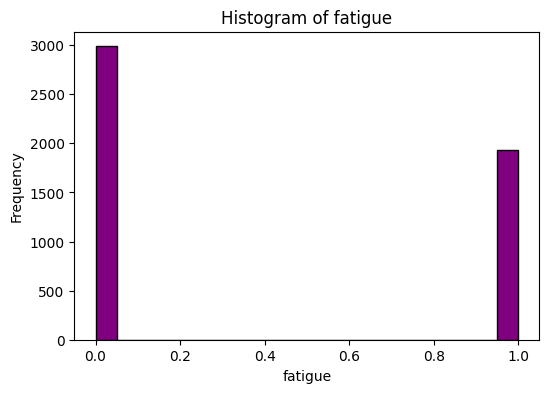

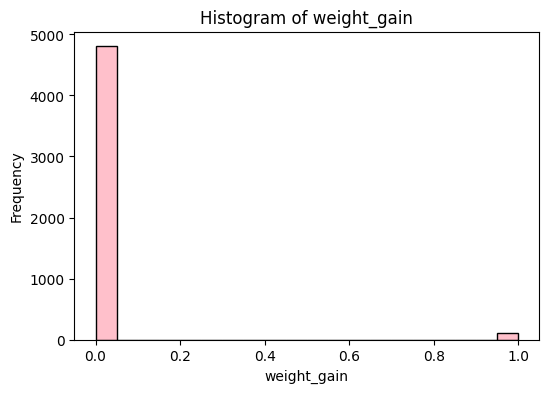

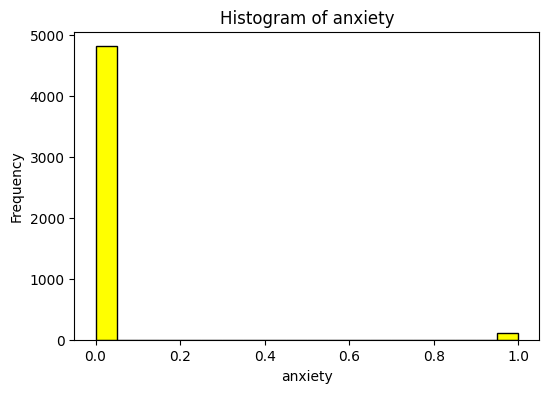

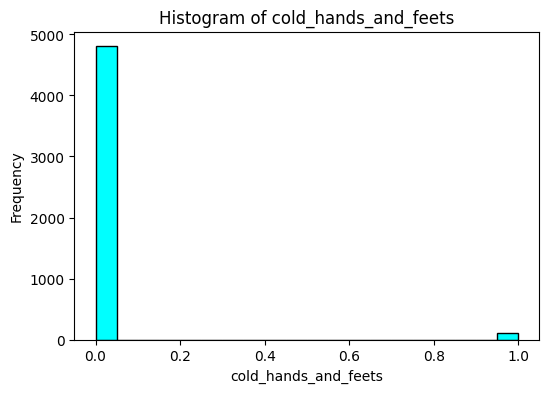

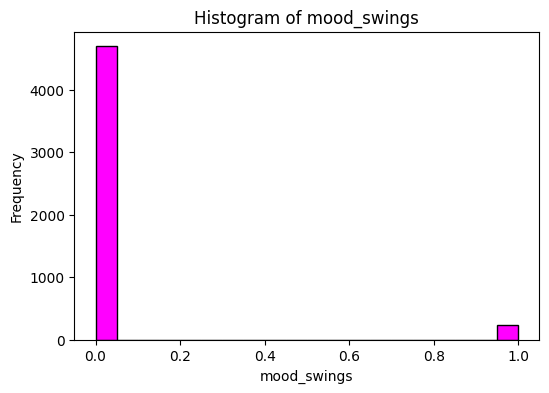

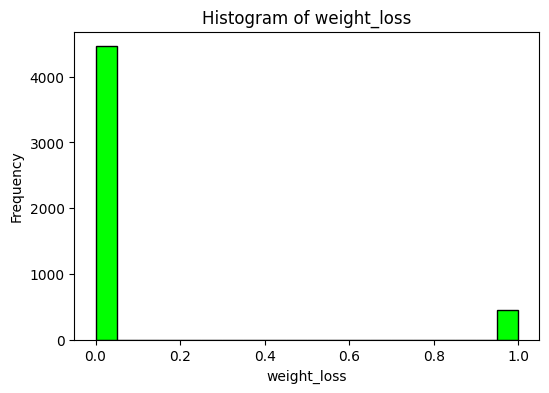

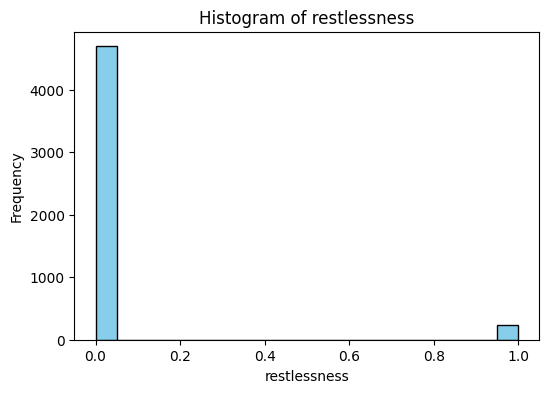

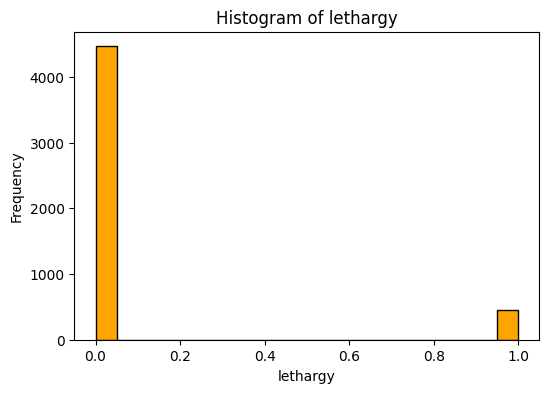

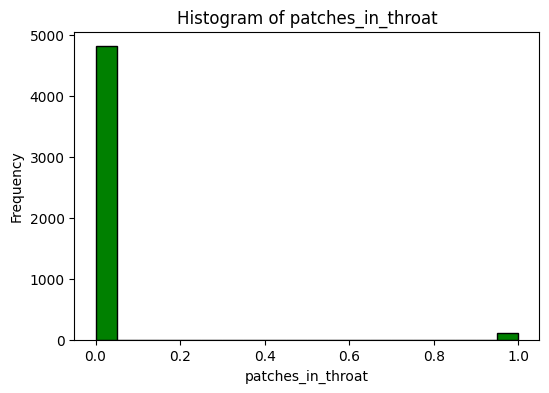

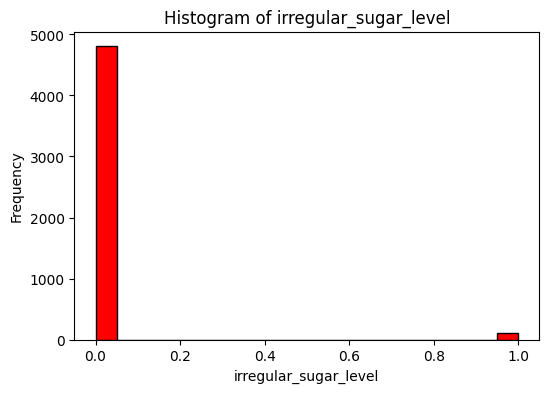

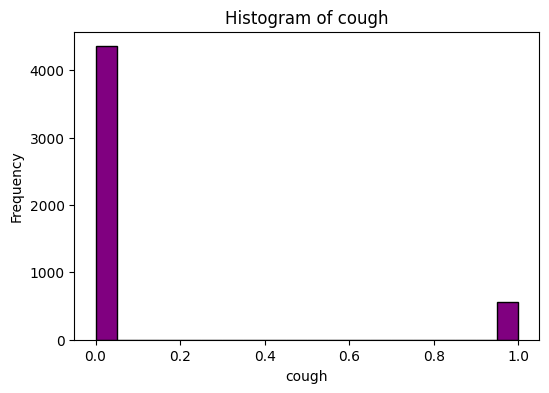

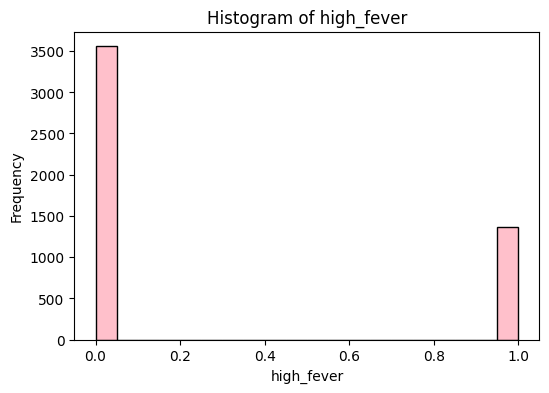

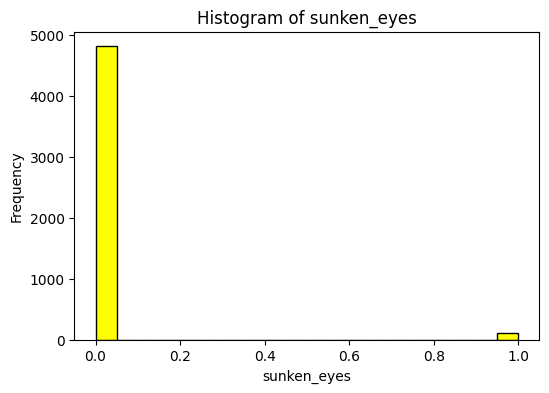

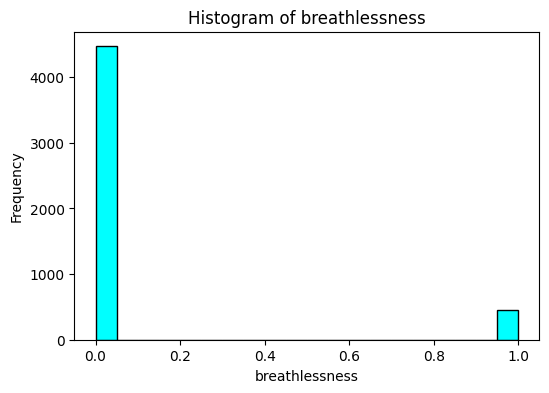

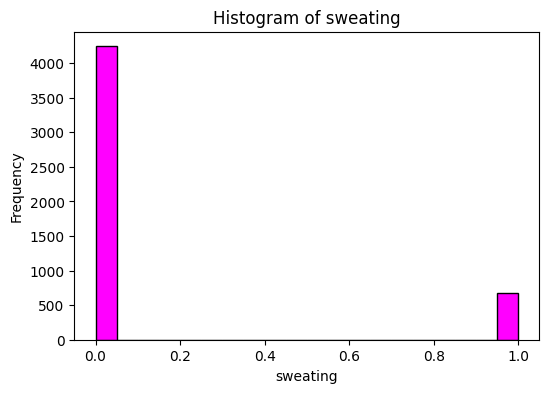

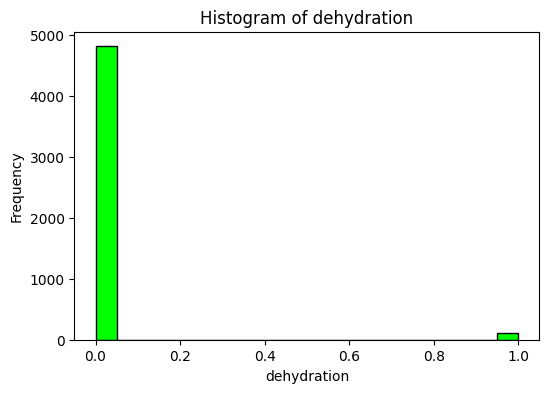

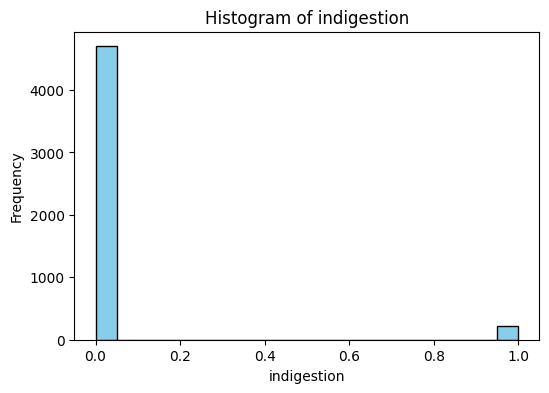

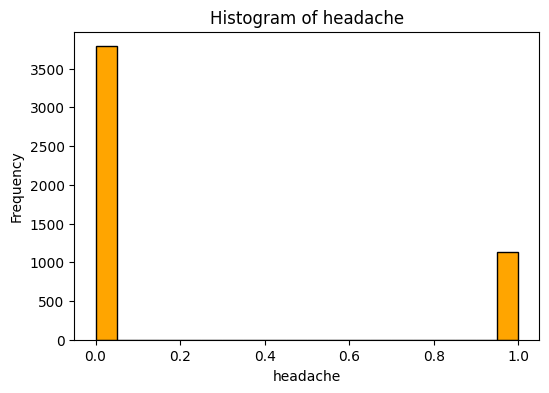

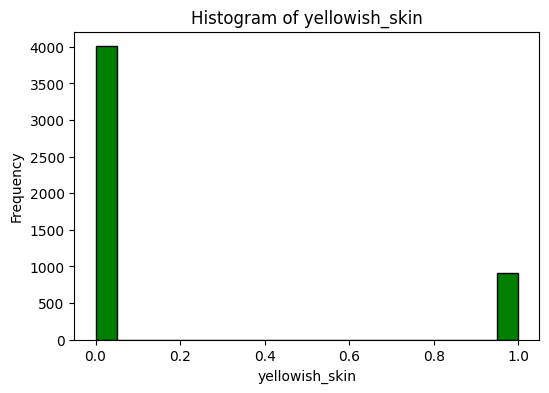

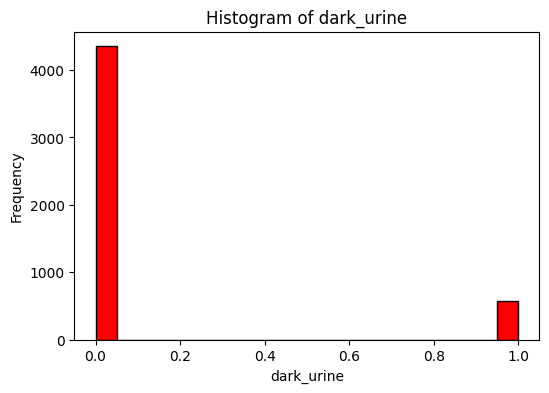

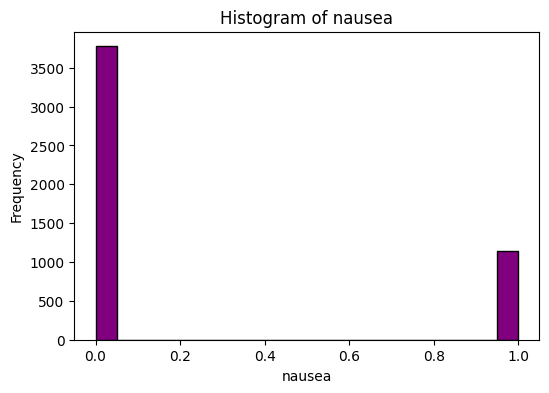

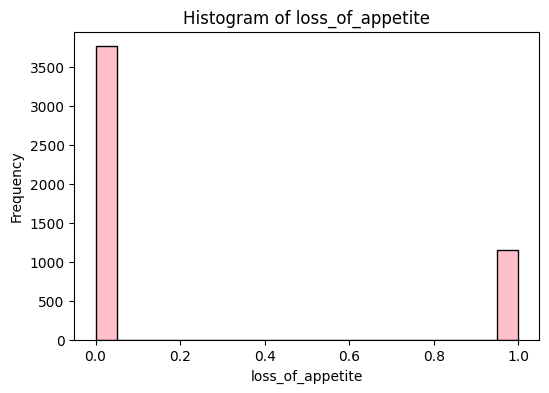

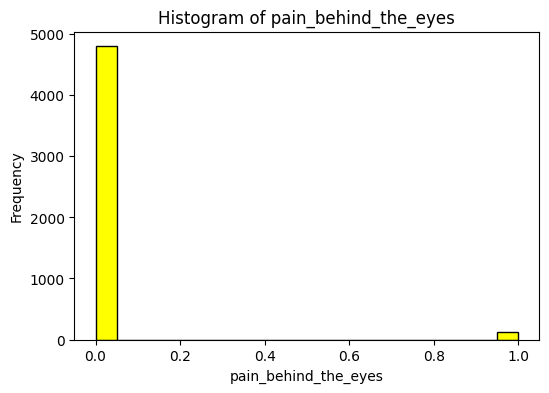

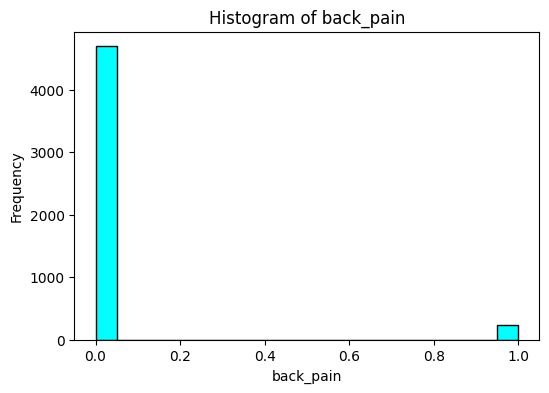

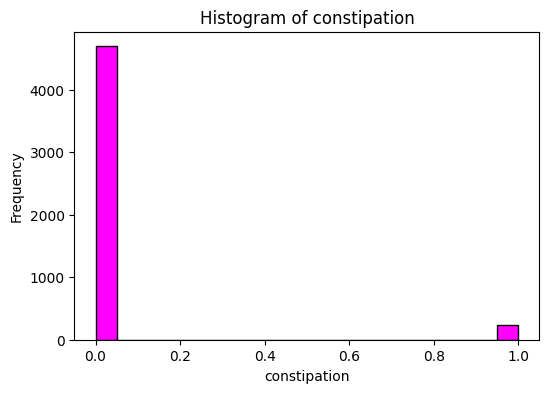

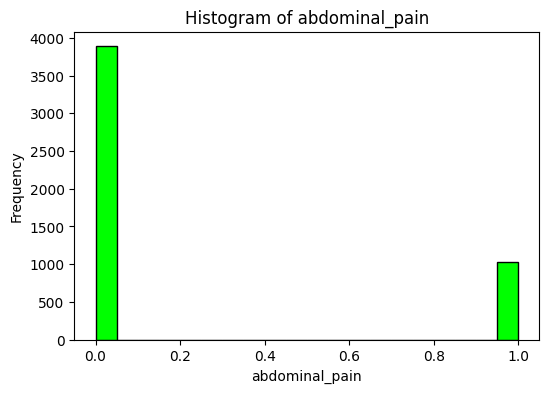

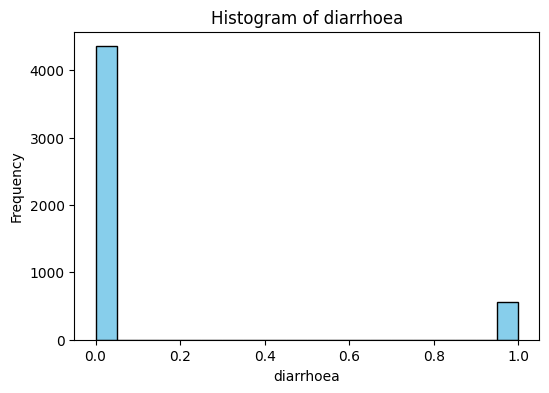

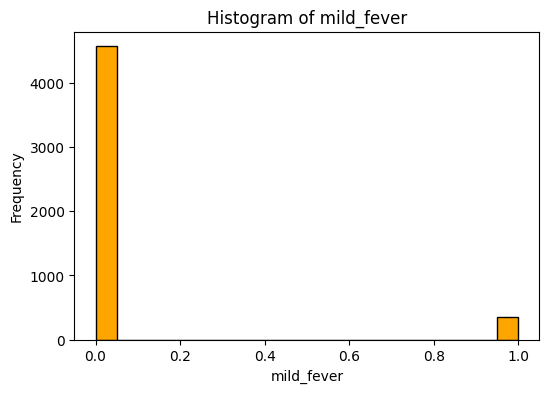

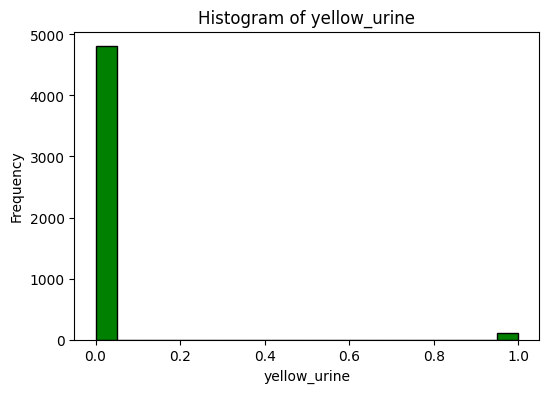

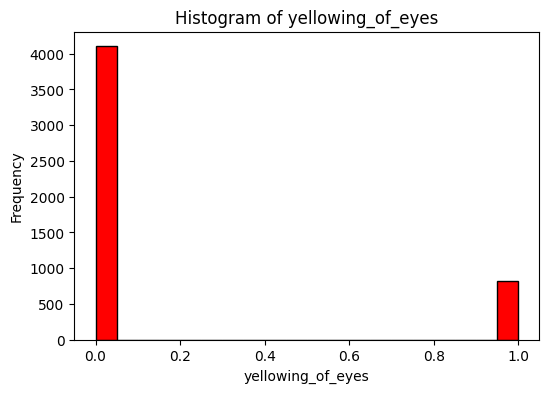

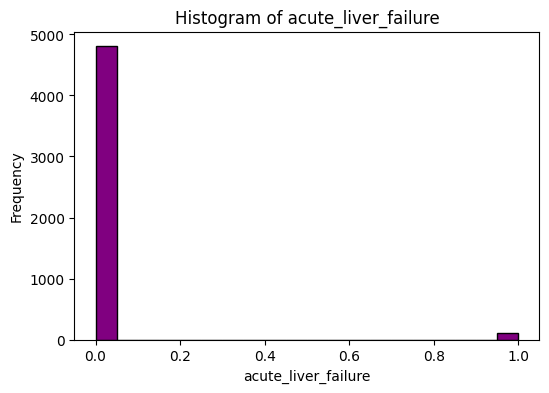

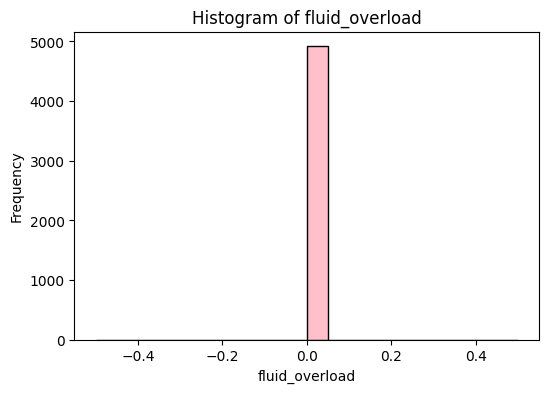

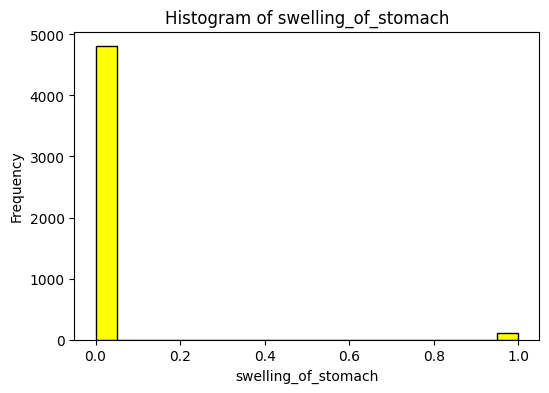

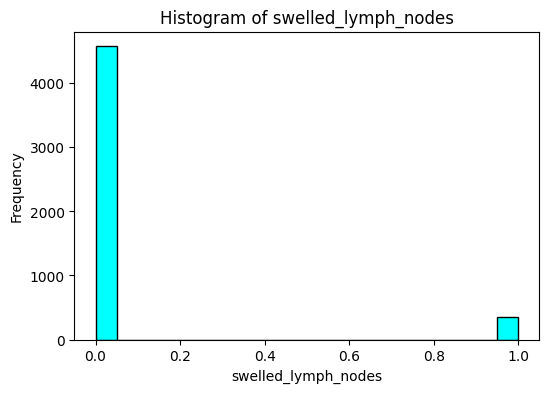

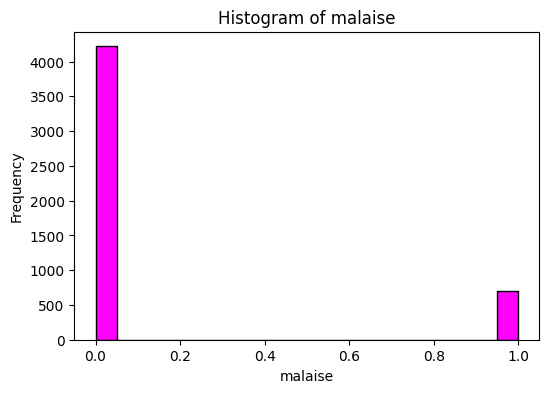

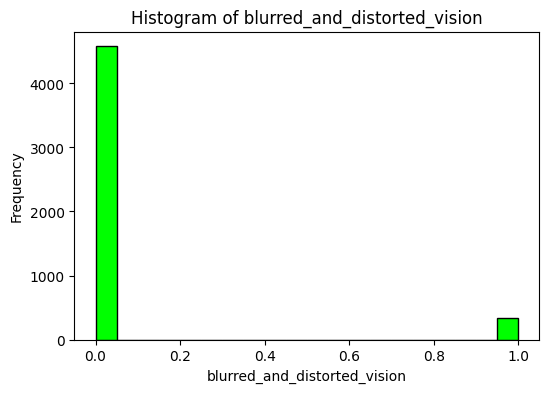

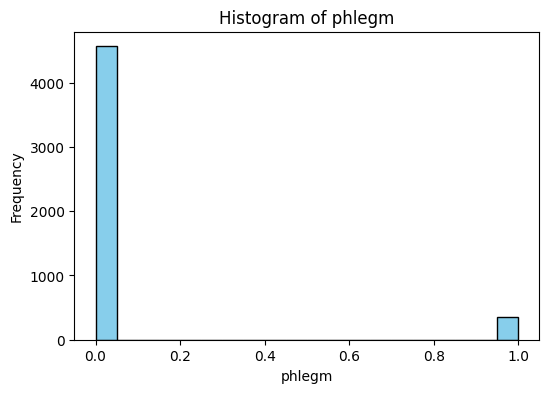

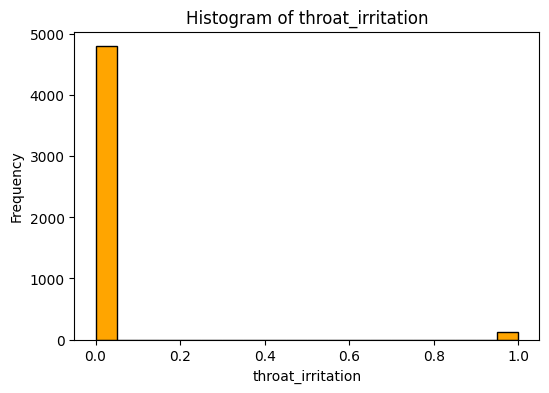

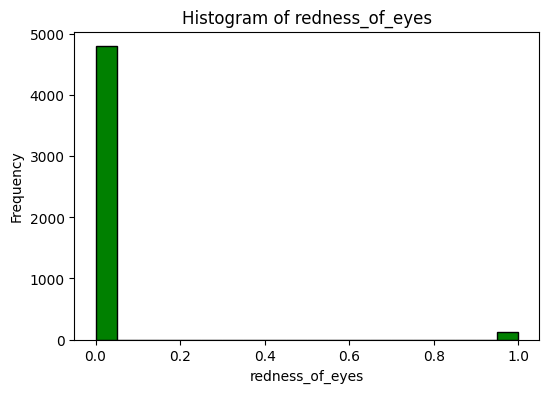

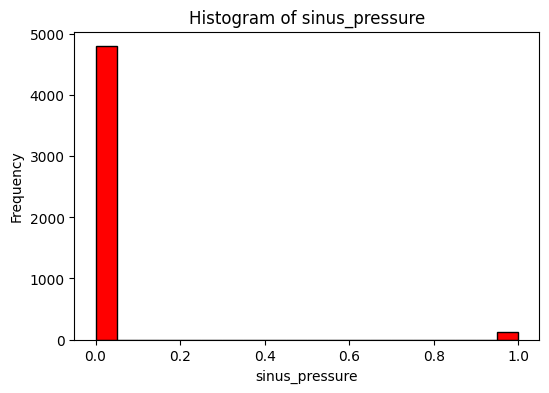

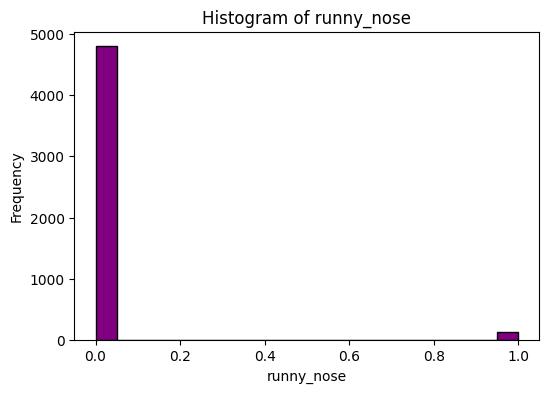

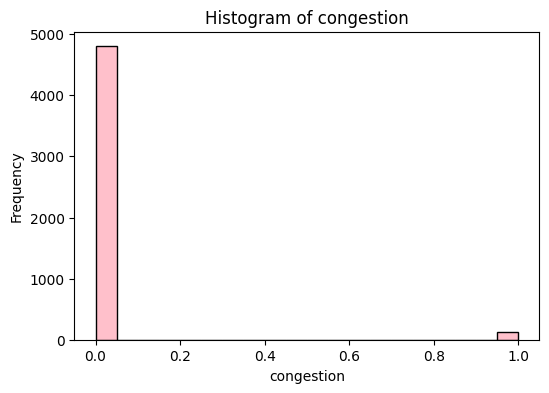

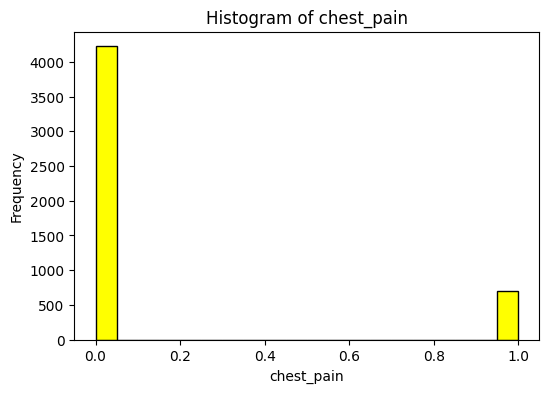

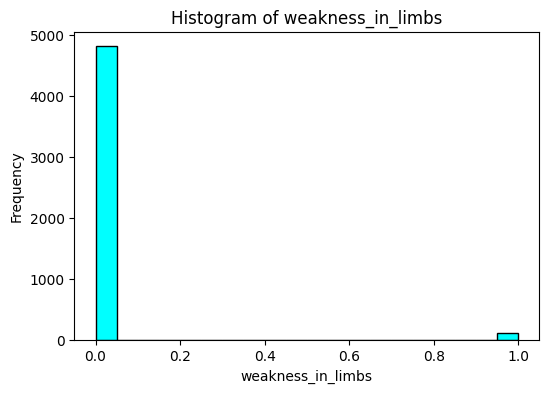

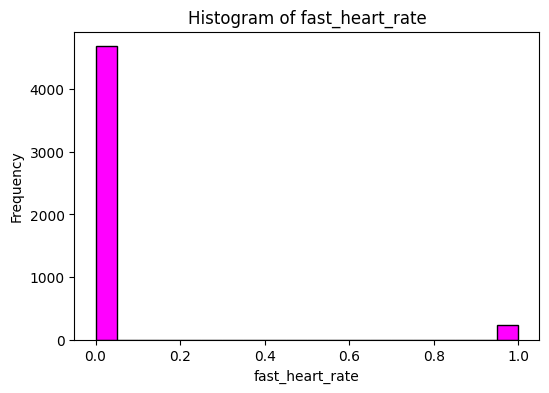

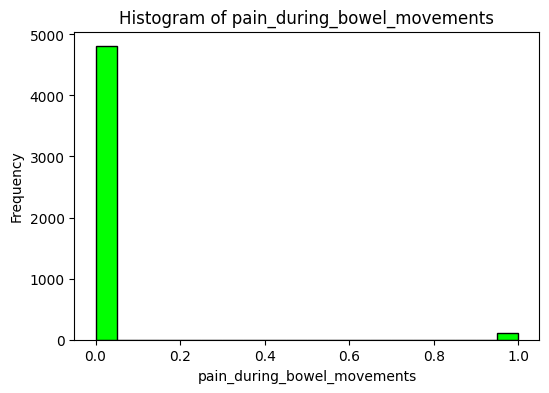

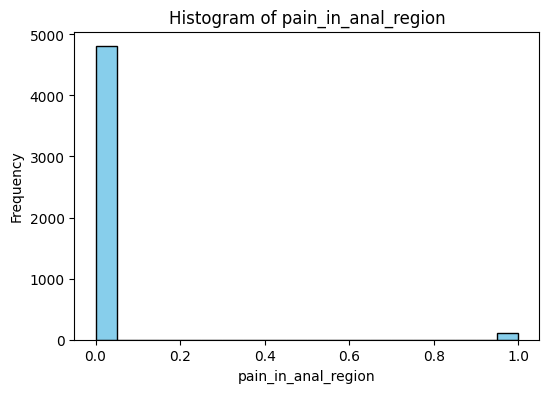

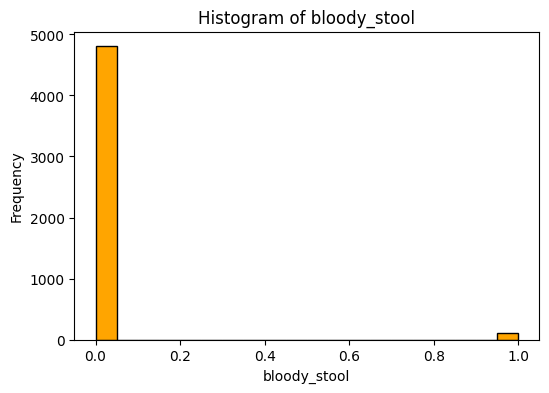

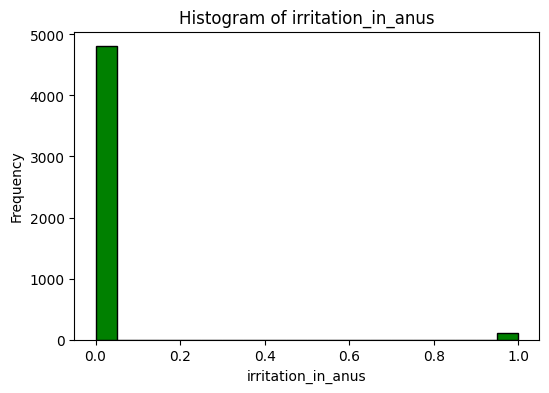

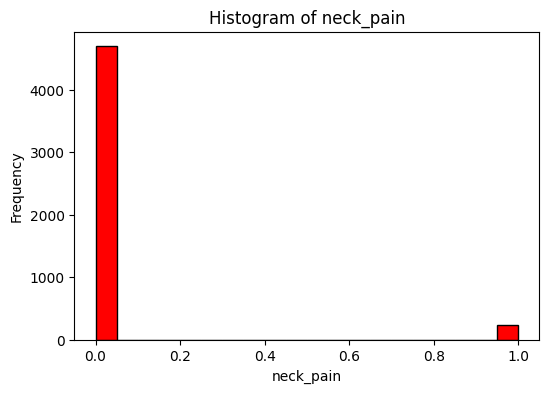

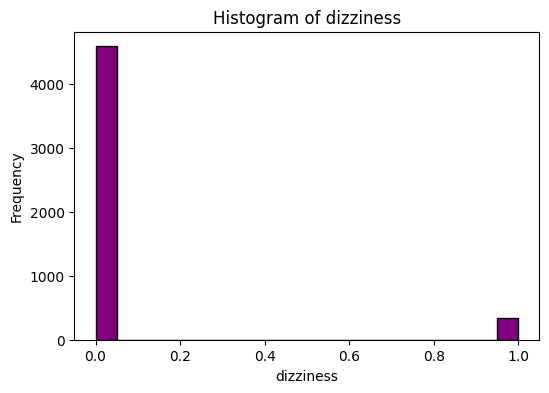

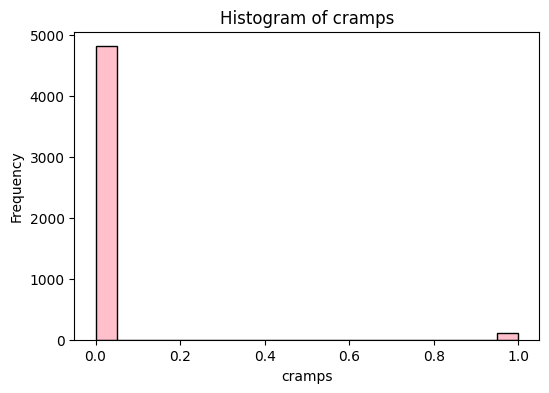

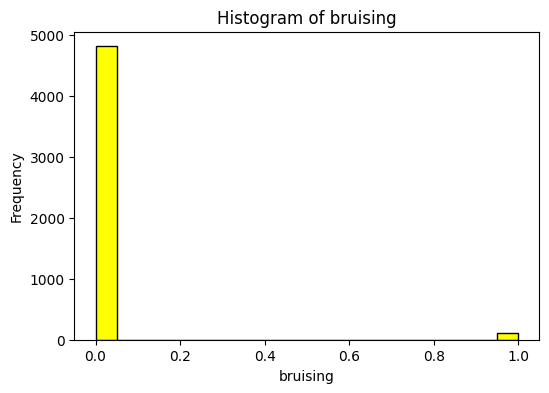

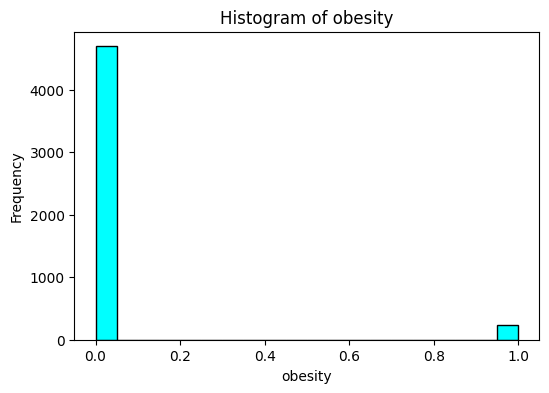

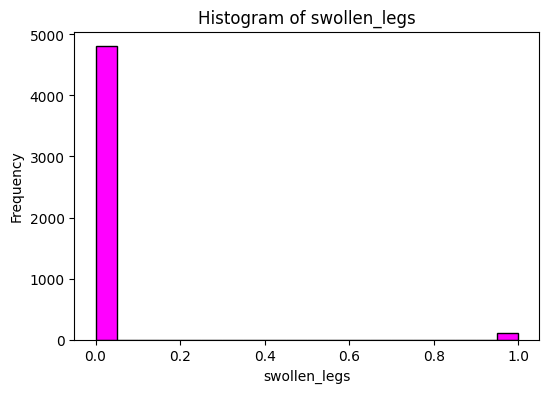

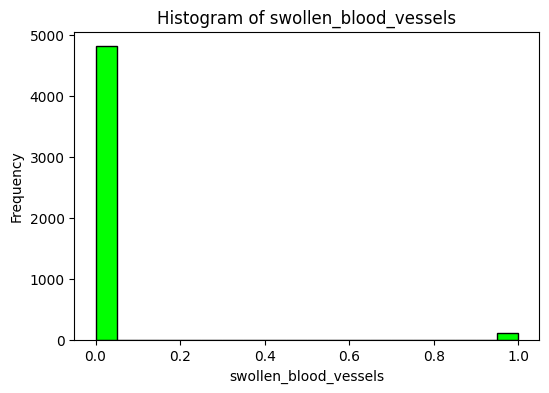

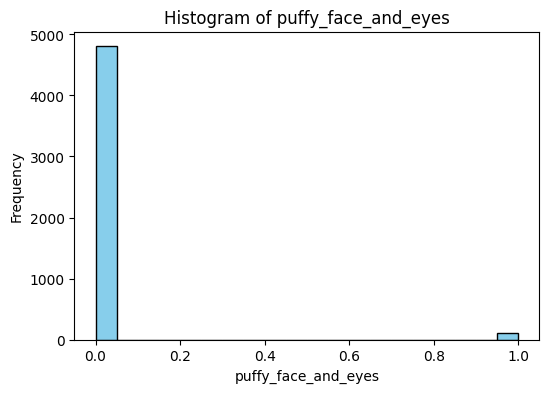

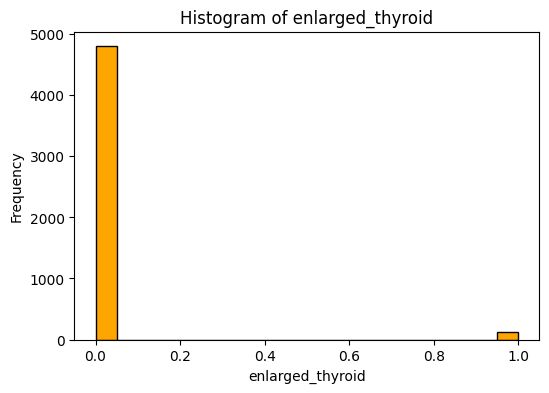

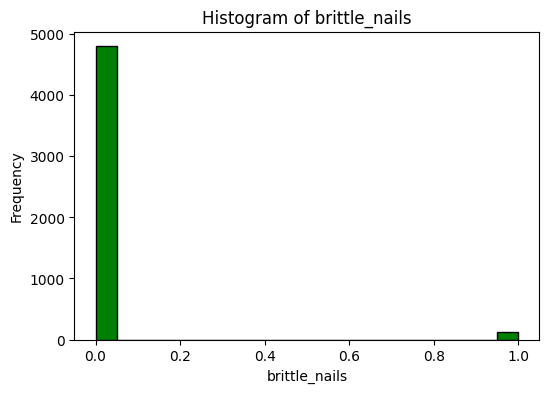

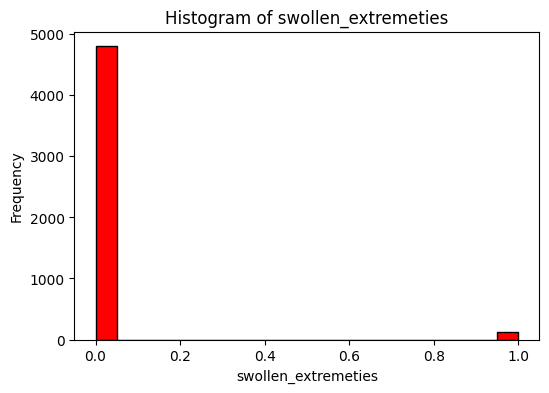

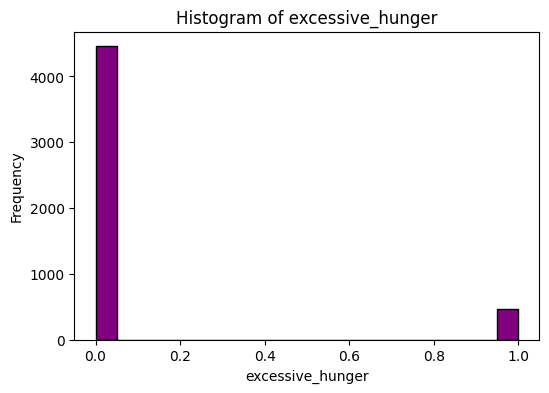

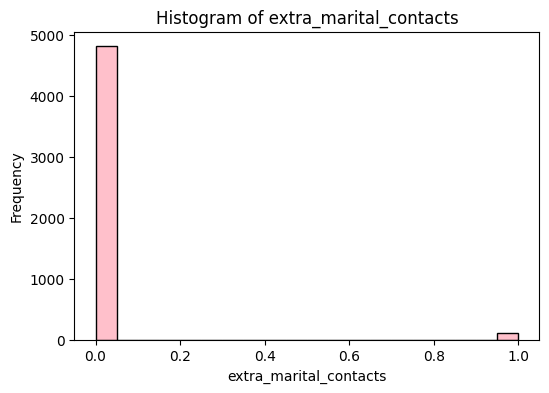

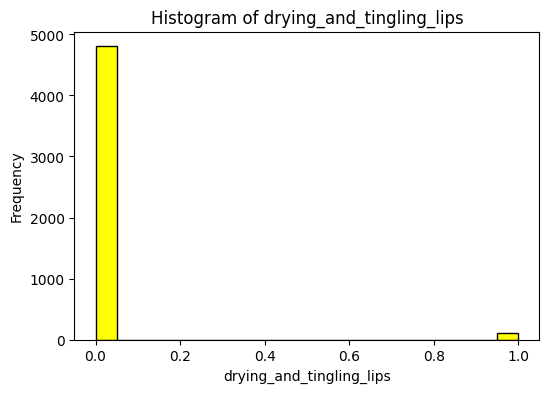

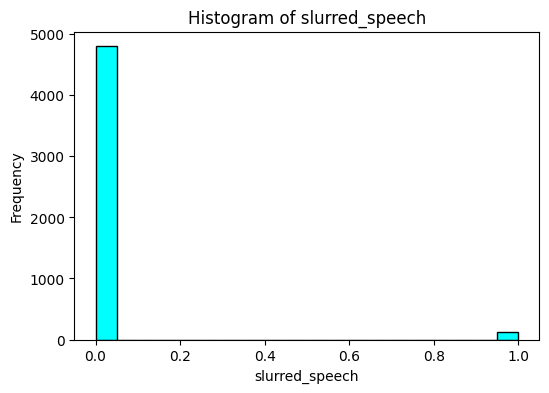

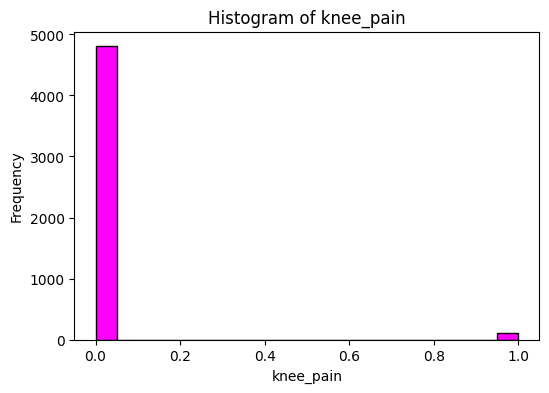

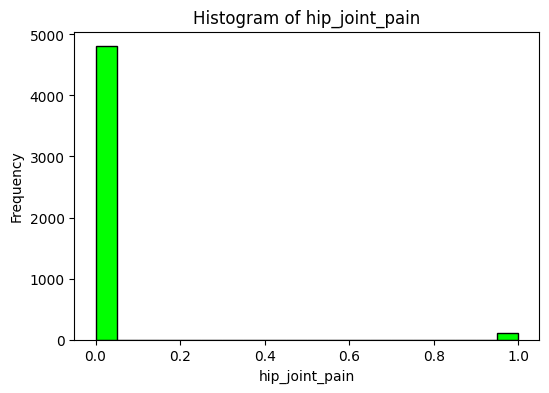

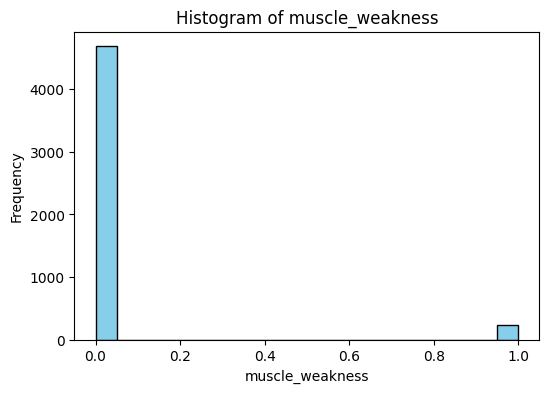

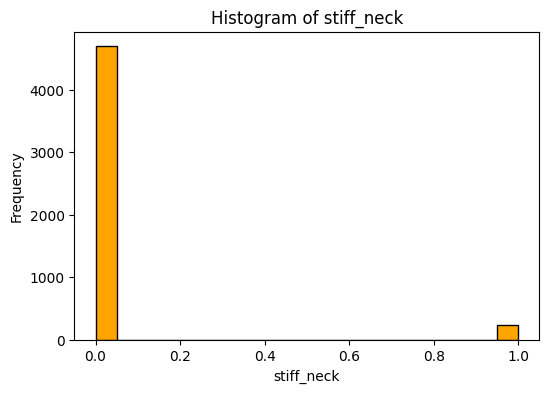

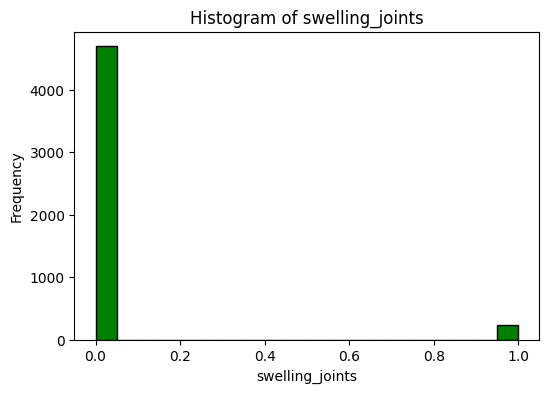

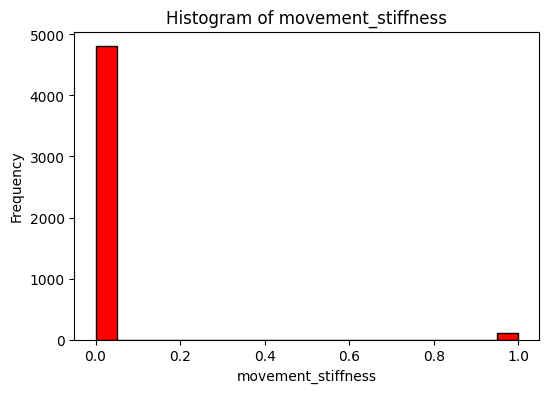

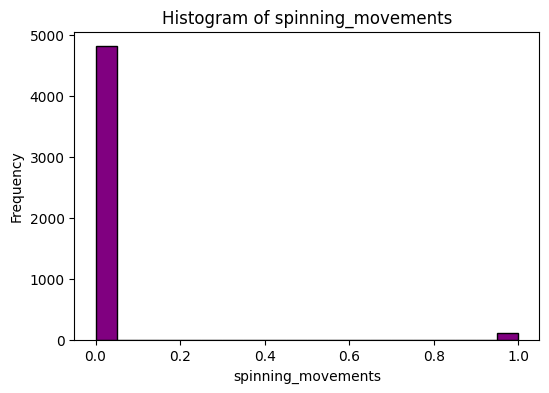

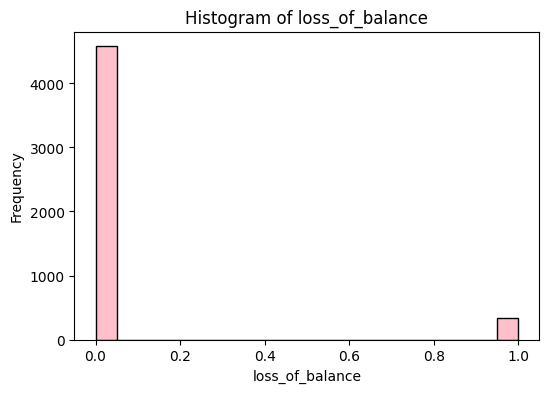

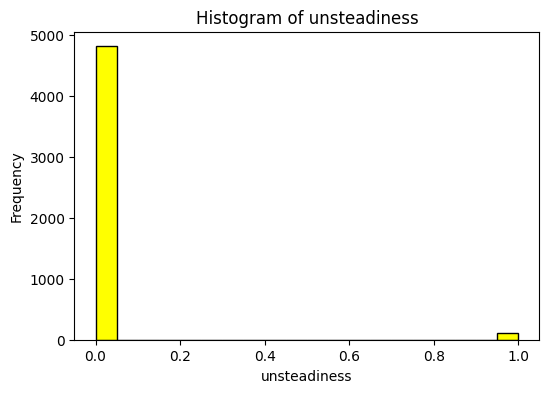

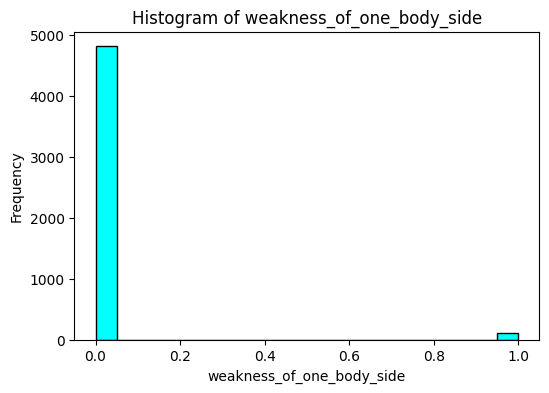

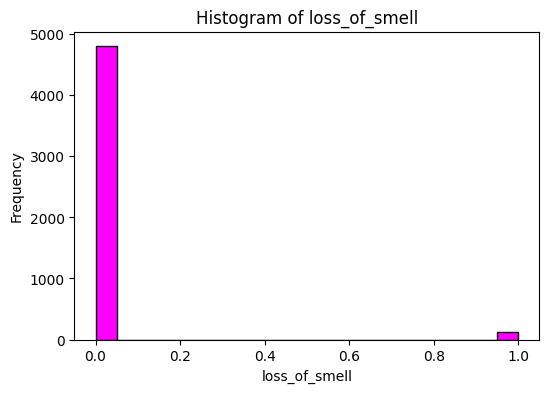

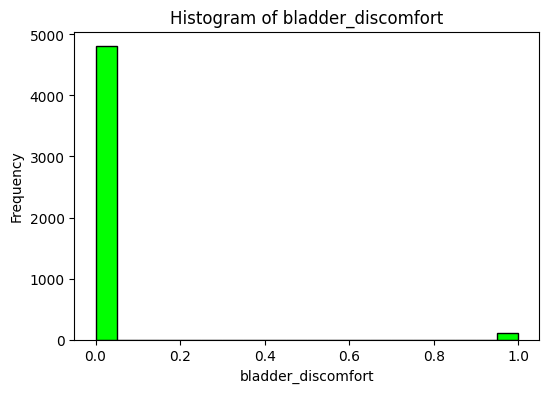

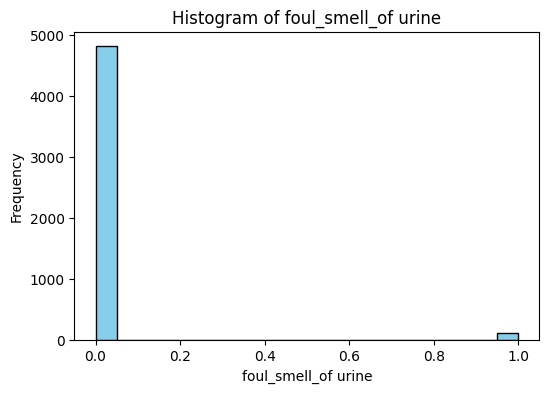

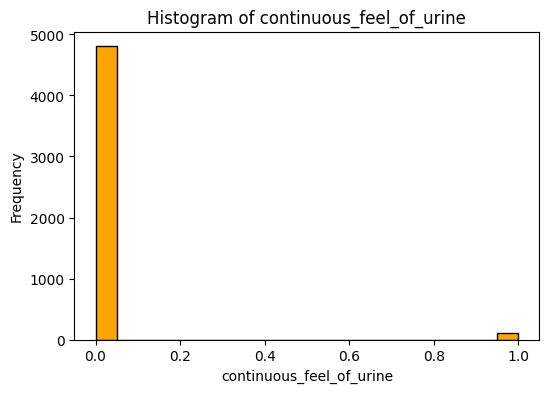

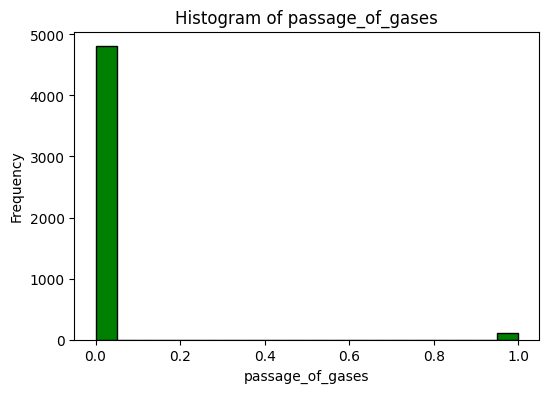

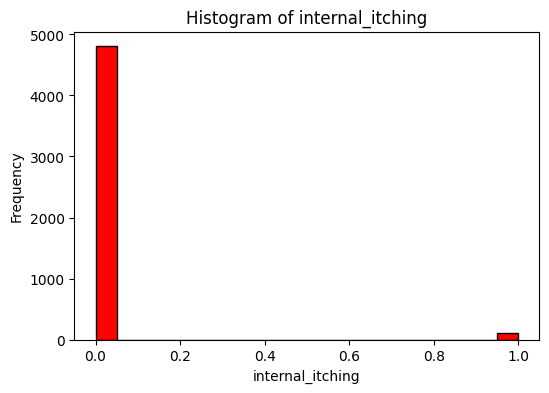

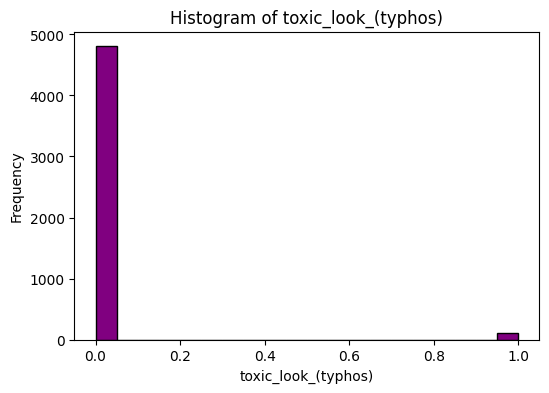

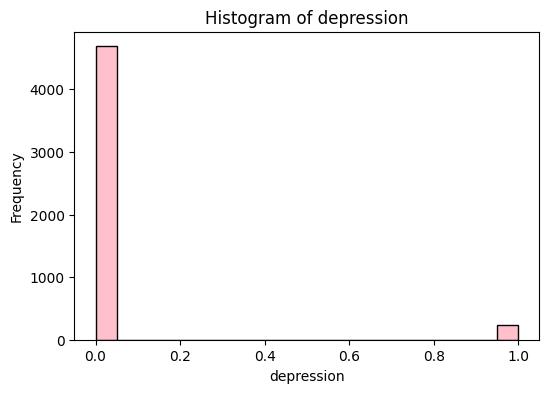

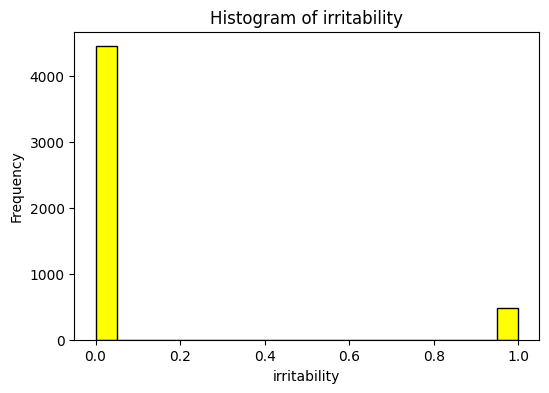

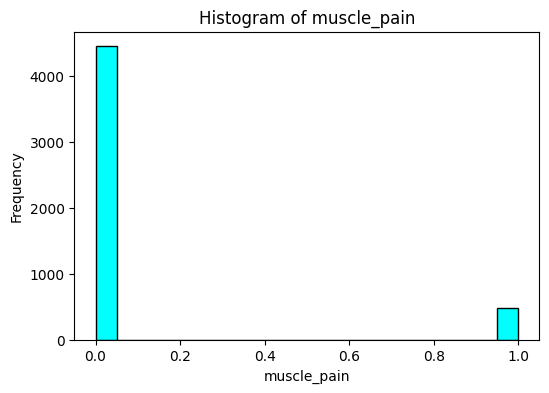

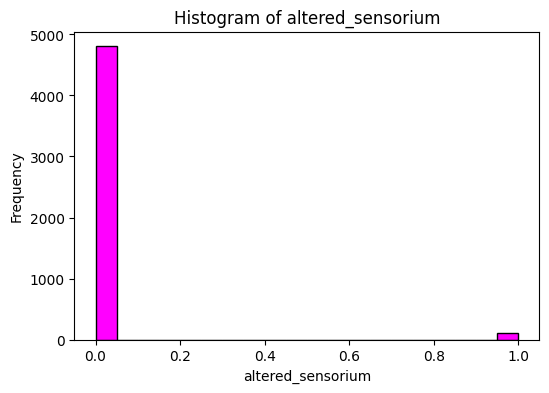

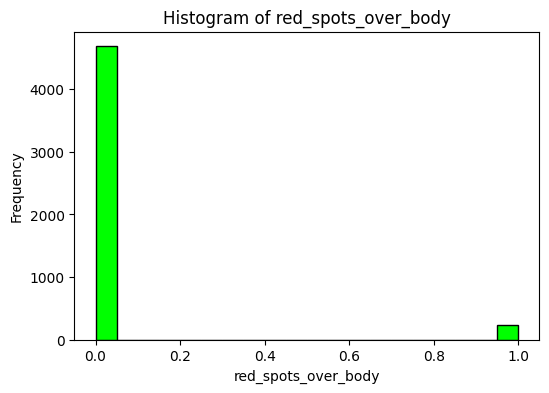

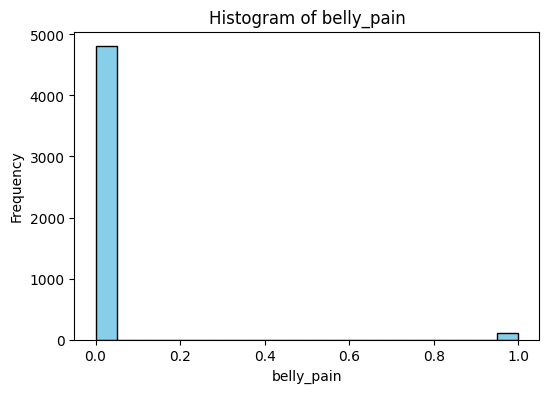

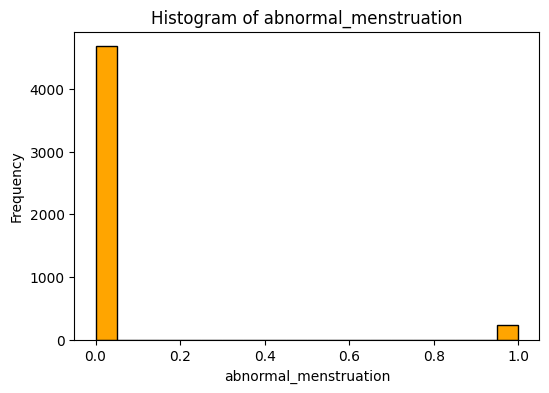

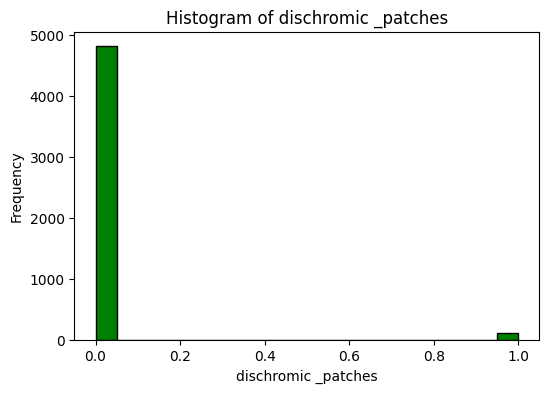

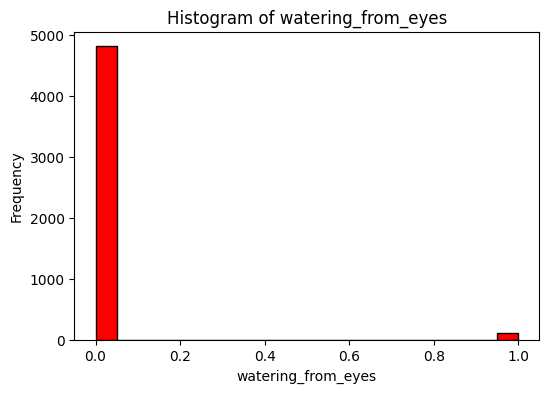

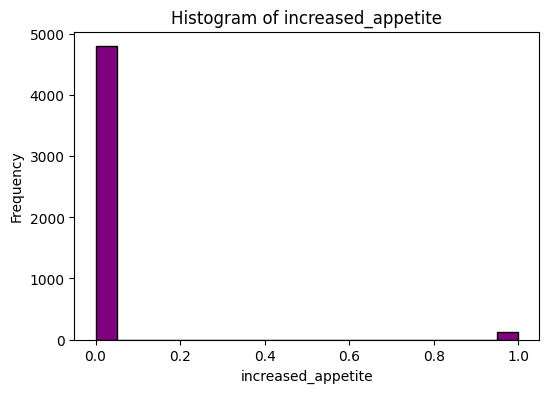

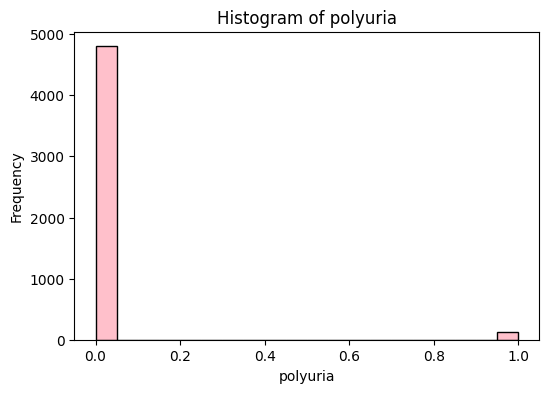

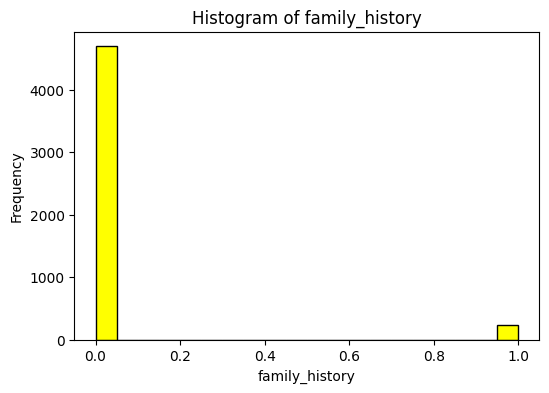

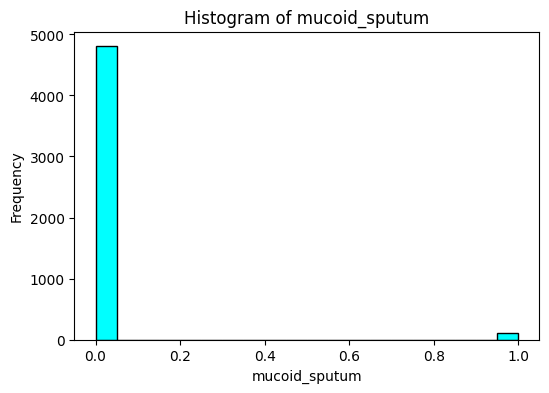

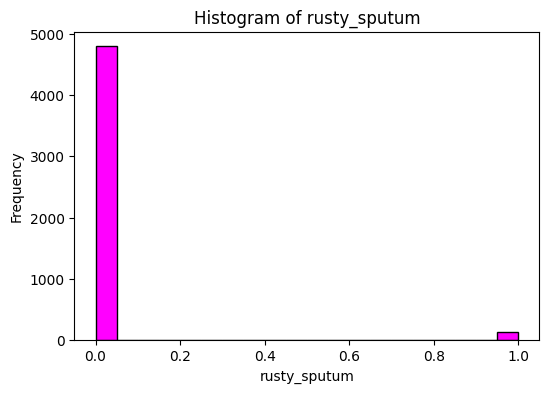

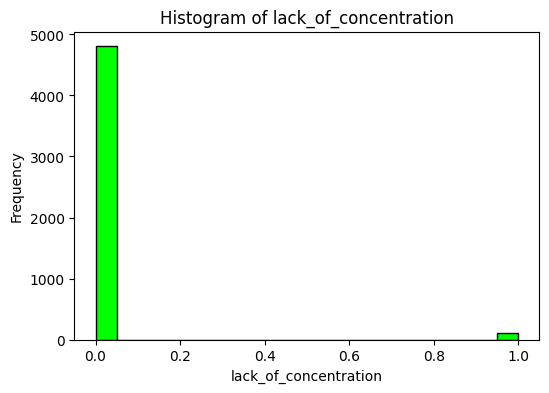

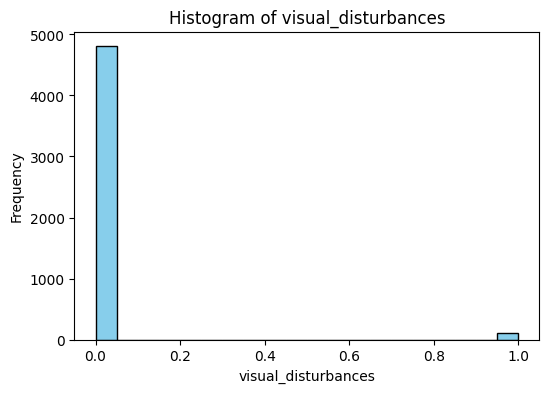

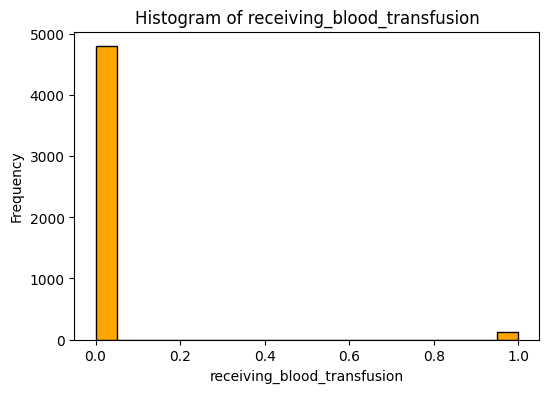

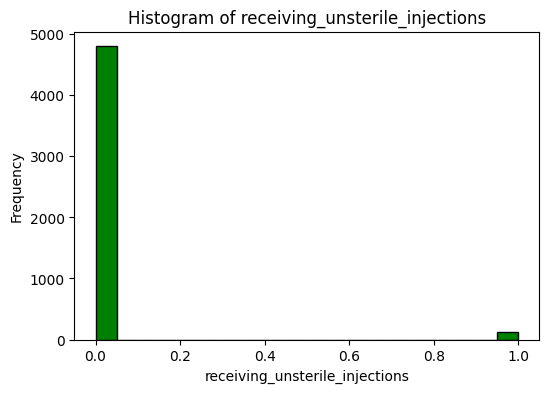

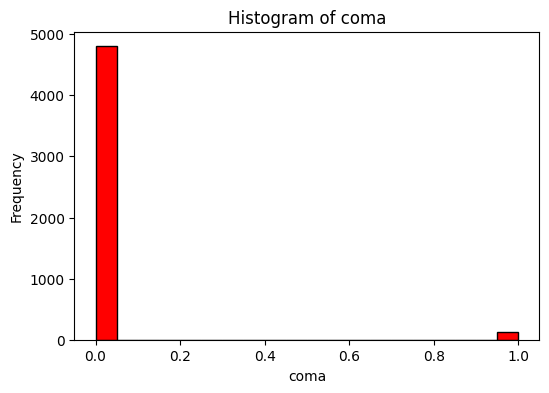

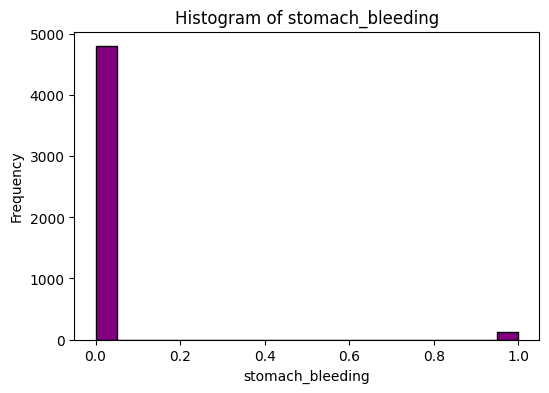

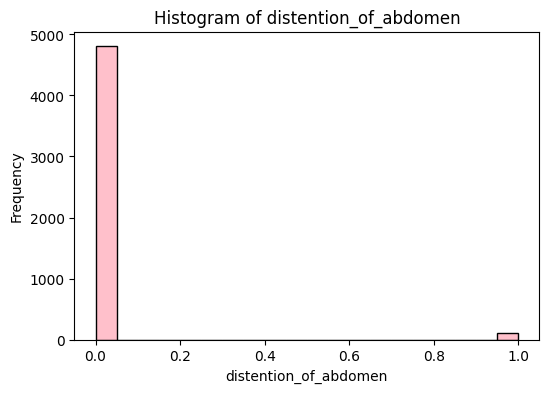

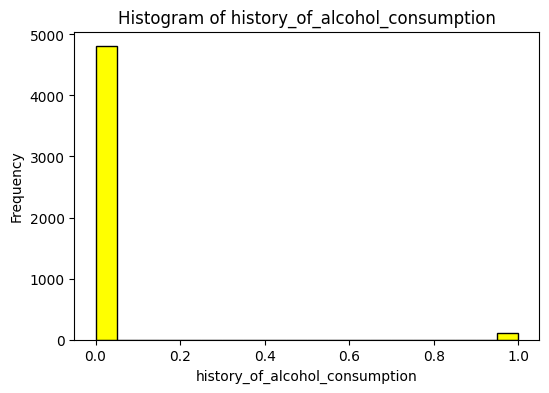

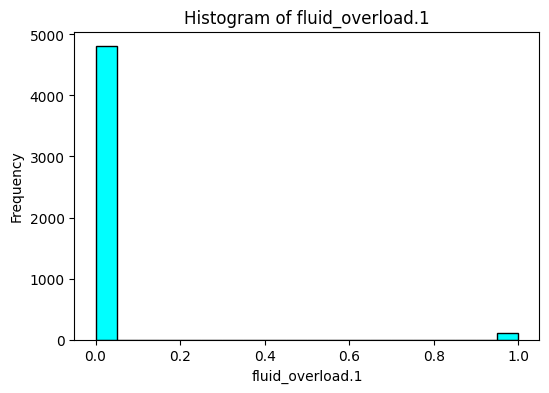

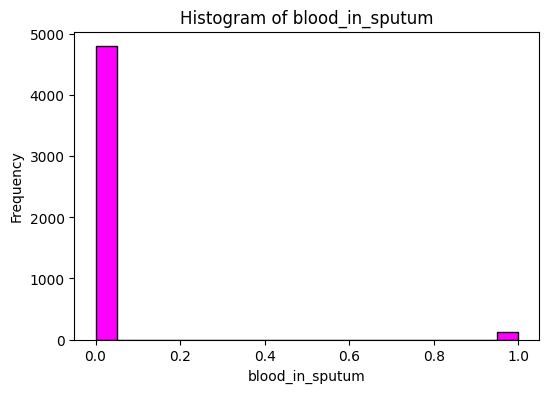

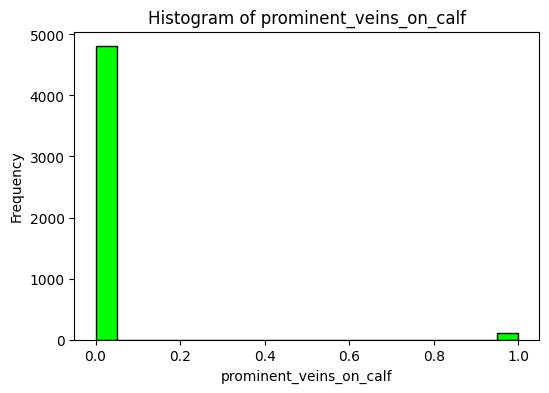

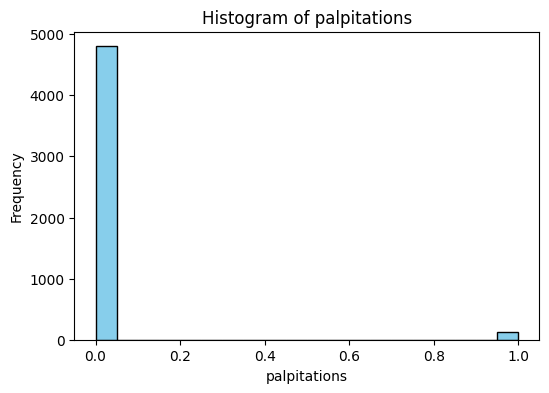

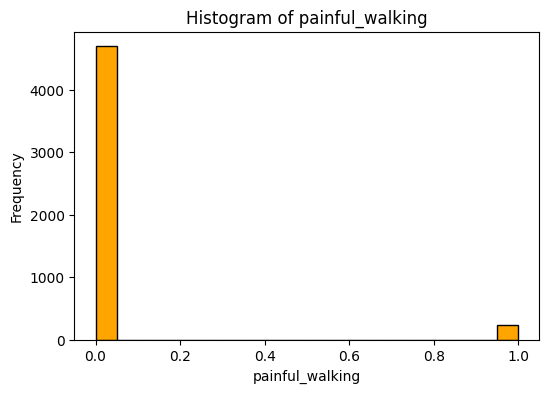

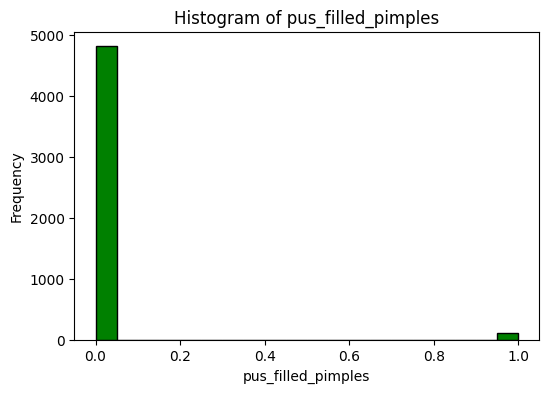

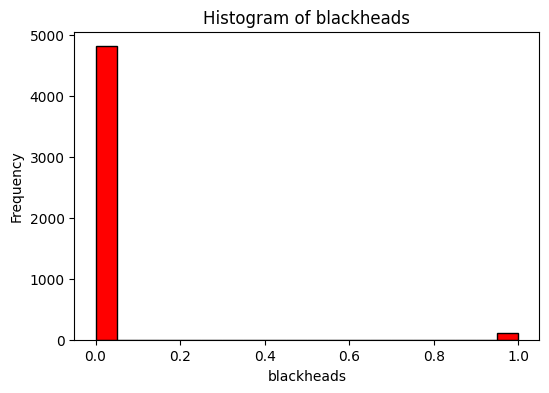

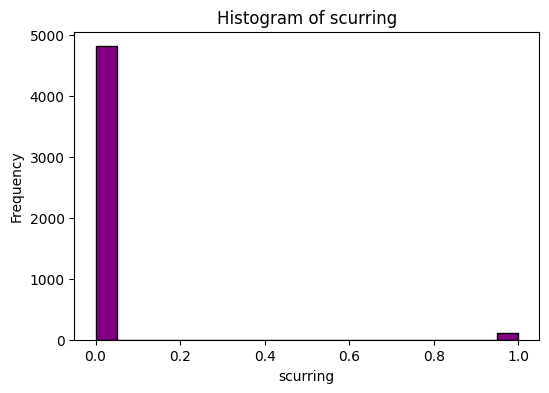

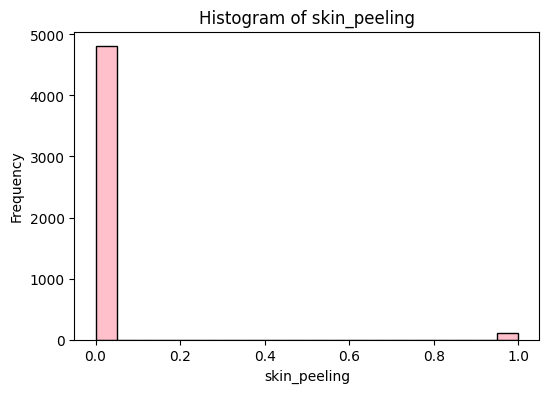

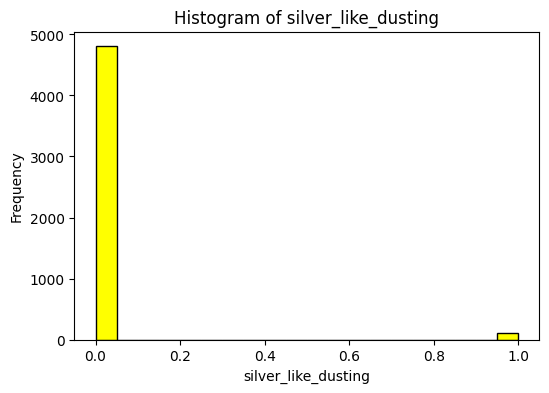

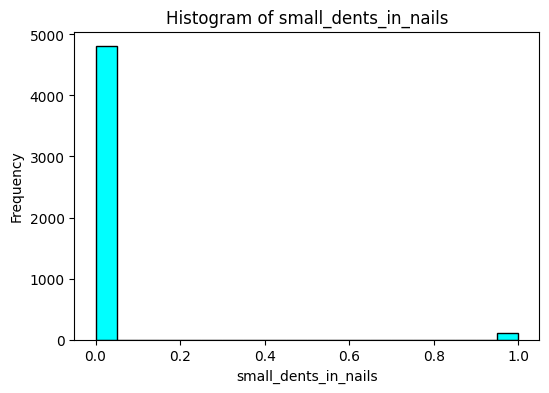

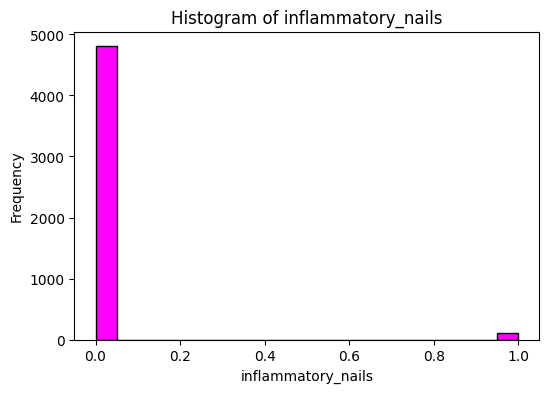

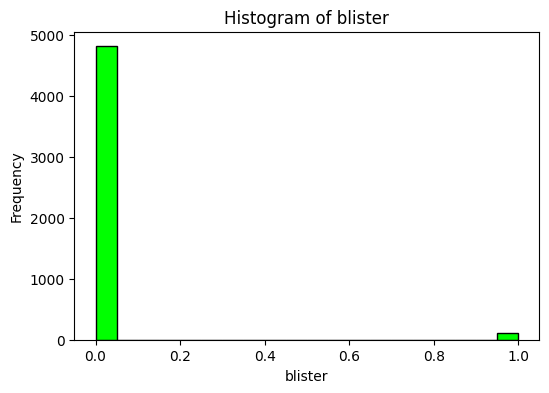

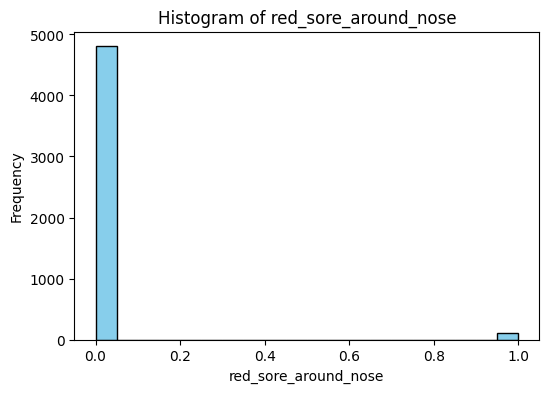

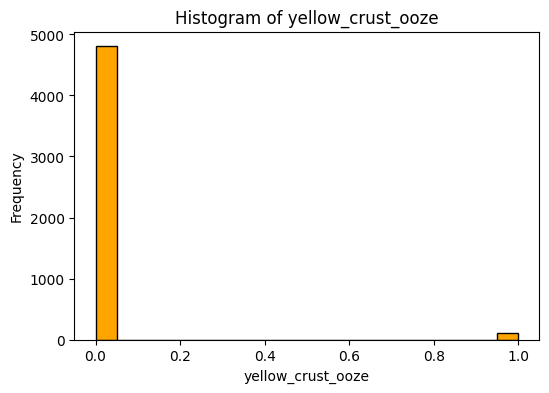

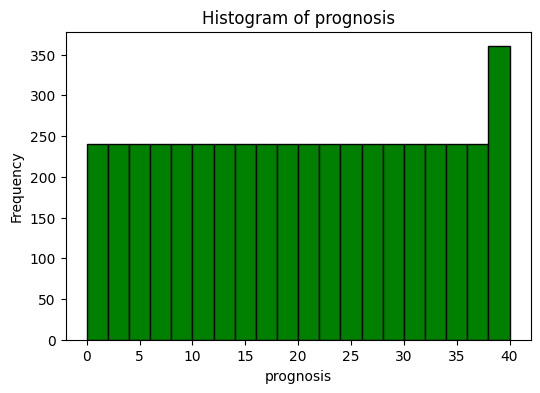

In [54]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink', 'yellow', 'cyan', 'magenta', 'lime']
for i, column in enumerate(training_data.columns):
    plt.figure(figsize=(6, 4))
    training_data[column].hist(bins=20, color=colors[i % len(colors)], edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(False)
    plt.show()

In [11]:
encoder = LabelEncoder()
training_data["prognosis"] = encoder.fit_transform(training_data["prognosis"])


In [12]:
testing_data['prognosis']=encoder.fit_transform(testing_data['prognosis'])

In [13]:
training_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN


In [14]:
training_data.isna().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [15]:
testing_data.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [16]:
training_data.drop(columns=['Unnamed: 133'], inplace=True)

In [17]:
training_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [18]:
training_data.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

disease analysis using pie chart

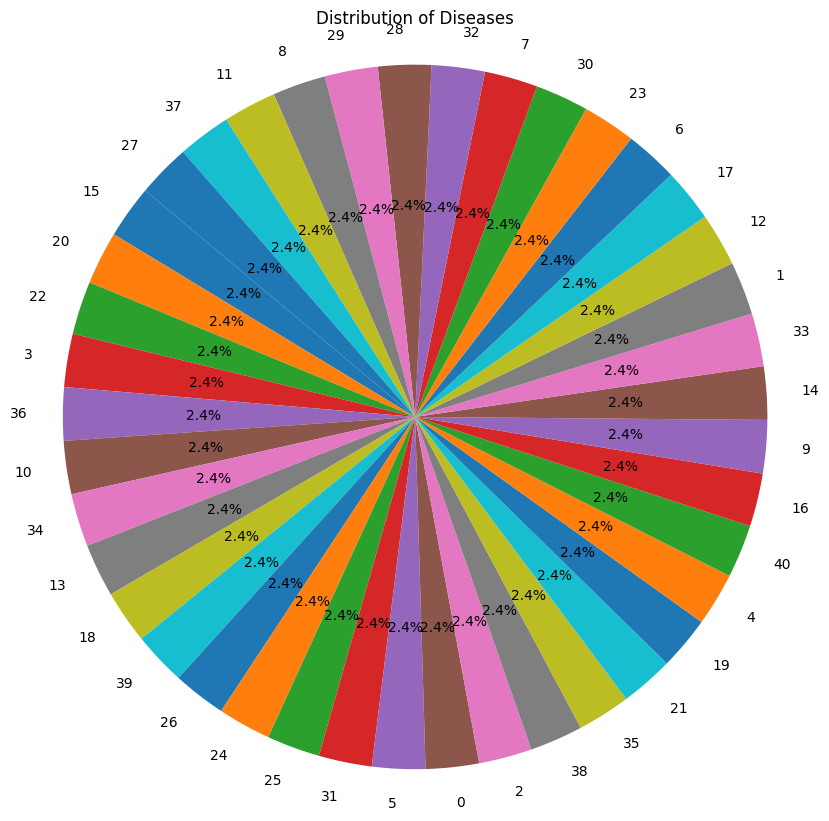

In [19]:
disease_counts = training_data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
plt.figure(figsize=(10, 10)) 
plt.pie(temp_df["Counts"], labels=temp_df["Disease"], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Diseases')  
plt.show()

In [20]:
training_data.shape

(4920, 133)

In [21]:
X=training_data.drop('prognosis',axis=1) 
y=training_data['prognosis']  

splitting data in training and testing

In [22]:
X1=testing_data.drop('prognosis',axis=1) 
y1=testing_data['prognosis'] 

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Randomforest classifier

In [24]:
randomforest=RandomForestClassifier(n_estimators=300 , random_state=42,max_depth=25)
randomforest.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=300, random_state=42)

In [25]:
y_pred=randomforest.predict(x_test)

In [26]:
y_pred

array([ 2,  2, 24,  1,  9, 23, 25,  5, 19, 30, 38, 12, 21, 35,  3,  3, 13,
       22, 12,  7,  6, 40, 19,  6,  4, 20, 34, 30, 26, 30,  9, 19, 17, 22,
       39, 30, 28, 14, 34, 38, 20,  0, 23, 12, 28, 17, 25, 19, 35, 35, 18,
       36, 39,  4, 24, 20, 37, 10, 38, 33, 25, 24, 36, 18,  0, 26, 32,  1,
        0, 13, 15,  6,  2, 22, 26,  9, 27, 27, 10, 30, 16, 27, 16, 14, 19,
        1, 28, 17,  0, 11, 26, 29, 21,  3, 36, 17, 29, 18, 34, 11, 23,  6,
        3,  4, 33, 39, 16, 30, 22,  1, 21, 39, 18, 25, 12, 14, 26, 28, 25,
        3,  7, 35, 32,  8,  5, 34, 17, 24, 35, 31, 11,  7,  7,  7,  9,  2,
       19, 34, 13, 37, 33, 18, 35, 19, 21, 31, 14, 39, 36,  3, 12, 31, 33,
       37, 23, 37, 25, 21,  3,  4,  6, 28,  1, 18, 40, 37, 29,  6, 27, 24,
       40, 21, 40, 17, 34, 27,  1, 40, 10,  8, 29,  1,  4, 40, 30, 37, 12,
       19, 11, 38, 37,  2, 39, 34, 22,  8, 15,  7, 19, 31, 17, 40, 39, 11,
       15,  0, 16,  4,  9,  8, 19, 31, 18, 13, 17, 28, 29, 18,  9, 21, 11,
        3,  3, 23, 32, 40

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print(accuracy_score(y_test,y_pred))

1.0


prediction on testing data


In [29]:
prediction1=randomforest.predict(X1)

In [30]:
prediction1

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27,  8])

In [31]:
accuracy1=accuracy_score(y1,prediction1)

In [32]:
accuracy1

0.9761904761904762

In [52]:
conf_matrix = confusion_matrix(y1, prediction1)
conf_matrix

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

standardscaler for scaling data without scaling we cannot perform support vector machine well

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [35]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)
scaled_x = scaler.transform(X1)

support vactor machine

In [36]:
svm_clf = SVC(kernel ='linear', random_state = 42,C= 100)
svm_clf.fit(scaled_x_train,y_train)

SVC(C=100, kernel='linear', random_state=42)

In [37]:
pred_y=svm_clf.predict(scaled_x_test)

In [38]:
print(accuracy_score(y_test,pred_y))

1.0


In [39]:
prediction2=svm_clf.predict(scaled_x)

In [40]:
print(accuracy_score(y1,prediction2))

0.9761904761904762


In [51]:
conf_matrix = confusion_matrix(y_test, pred_y)
conf_matrix


array([[18,  0,  0, ...,  0,  0,  0],
       [ 0, 30,  0, ...,  0,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 26,  0,  0],
       [ 0,  0,  0, ...,  0, 22,  0],
       [ 0,  0,  0, ...,  0,  0, 34]])

NaiveBayes ALgorithm

In [41]:
NaiveBayesclassifier = GaussianNB()

In [42]:
NaiveBayesclassifier.fit(scaled_x_train,y_train)

GaussianNB()

In [43]:
pred_y2=NaiveBayesclassifier.predict(scaled_x_test)

In [44]:
print(accuracy_score(y_test,pred_y2))

1.0


In [49]:
conf_matrix = confusion_matrix(y_test, pred_y2)
conf_matrix

array([[18,  0,  0, ...,  0,  0,  0],
       [ 0, 30,  0, ...,  0,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 26,  0,  0],
       [ 0,  0,  0, ...,  0, 22,  0],
       [ 0,  0,  0, ...,  0,  0, 34]])

In [45]:
prediction3=NaiveBayesclassifier.predict(scaled_x)

In [46]:
print(accuracy_score(y1,prediction3))

0.9761904761904762


In [50]:
print(confusion_matrix(y1,prediction3))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
